In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import random
import os
sns.set_style('white')
import glob

In [4]:
tennis_df_all=pd.read_csv('/Users/y2z/Desktop/ATP.csv')

/Users/y2z/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (3,5,6,7,8,9,12,14,15,16,17,18,19,22,24,25,26,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
tennis_df_all.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,w_bpFaced,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced
0,1968-580,Australian Chps.,Grass,64,G,19680119,1,110023,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1968-580,Australian Chps.,Grass,64,G,19680119,2,109803,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1968-580,Australian Chps.,Grass,64,G,19680119,3,100257,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1968-580,Australian Chps.,Grass,64,G,19680119,4,100105,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1968-580,Australian Chps.,Grass,64,G,19680119,5,109966,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
tennis_df_all['tourney_yearmonth']=tennis_df_all.tourney_date.astype(str).str[:6]
tennis_df_all['tourney_year']=tennis_df_all.tourney_date.astype(str).str[:4]

In [7]:
tennis_df_all=tennis_df_all[tennis_df_all['tourney_year'].between('1968','2016')]
tennis_df_all.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,tourney_yearmonth,tourney_year
0,1968-580,Australian Chps.,Grass,64,G,19680119,1,110023,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196801,1968
1,1968-580,Australian Chps.,Grass,64,G,19680119,2,109803,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196801,1968
2,1968-580,Australian Chps.,Grass,64,G,19680119,3,100257,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196801,1968
3,1968-580,Australian Chps.,Grass,64,G,19680119,4,100105,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196801,1968
4,1968-580,Australian Chps.,Grass,64,G,19680119,5,109966,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196801,1968


In [8]:
tennis_df_all['winner_rank']=tennis_df_all['winner_rank'].fillna(0).astype(int)
tennis_df_all['loser_rank']=tennis_df_all['loser_rank'].fillna(0).astype(float)
tennis_df_all['loser_rank'] = tennis_df_all['loser_rank'].fillna(0).astype(float)
tennis_df_all['winner_age'] = tennis_df_all['winner_age'].dropna().astype(float)
tennis_df_all['loser_age'] = tennis_df_all['loser_age'].dropna().astype(float)
tennis_df_all['winner_ht'] = tennis_df_all['winner_ht'].dropna().astype(int)
tennis_df_all['loser_ht'] = tennis_df_all['loser_ht'].dropna().astype(int)
tennis_df_all['w_svpt'] = tennis_df_all['w_svpt'].fillna(0).astype(int)
tennis_df_all['l_svpt'] = tennis_df_all['l_svpt'].fillna(0).astype(int)
tennis_df_all['w_ace'] = tennis_df_all['w_ace'].fillna(0).astype(int)
tennis_df_all['l_ace'] = tennis_df_all['l_ace'].fillna(0).astype(int)
tennis_df_all['w_df'] = tennis_df_all['w_df'].fillna(0).astype(int)
tennis_df_all['l_df'] = tennis_df_all['l_df'].fillna(0).astype(int)
tennis_df_all['w_bpSaved'] = tennis_df_all['w_bpSaved'].fillna(0).astype(int)
tennis_df_all['l_bpSaved'] = tennis_df_all['l_bpSaved'].fillna(0).astype(int)

tennis_df = tennis_df_all[tennis_df_all['tourney_year'].between('2000','2016')]

In [9]:
tennis_df.head()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,tourney_yearmonth,tourney_year
110457,2000-717,Orlando,Clay,32,A,20000501,1,102179,NaN,NaN,...,4,110,59,49,31,17,4,4,200005,2000
110458,2000-717,Orlando,Clay,32,A,20000501,2,103602,NaN,Q,...,0,57,24,13,17,10,4,9,200005,2000
110459,2000-717,Orlando,Clay,32,A,20000501,3,103387,NaN,NaN,...,2,65,39,22,10,8,6,10,200005,2000
110460,2000-717,Orlando,Clay,32,A,20000501,4,101733,NaN,NaN,...,6,104,57,35,24,15,6,11,200005,2000
110461,2000-717,Orlando,Clay,32,A,20000501,5,101727,4,NaN,...,3,47,28,17,10,8,3,6,200005,2000


In [10]:
tennis_df.tail()

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,tourney_yearmonth,tourney_year
163573,2016-M-DC-2016-WG-PO-KAZ-RUS-01,Davis Cup WG PO: KAZ vs RUS,Hard,4,D,20160916,4,105723,NaN,NaN,...,2,87,60,34,8,11,7,13,201609,2016
163574,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,1,104797,NaN,NaN,...,3,88,53,35,14,13,4,8,201609,2016
163575,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,2,105967,NaN,NaN,...,1,107,73,36,18,12,10,16,201609,2016
163576,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,4,104797,NaN,NaN,...,6,169,103,70,34,24,2,7,201609,2016
163577,2016-M-DC-2016-WG-PO-SUI-UZB-01,Davis Cup WG PO: SUI vs UZB,Clay,4,D,20160916,5,134472,NaN,NaN,...,3,114,63,39,26,19,6,14,201609,2016


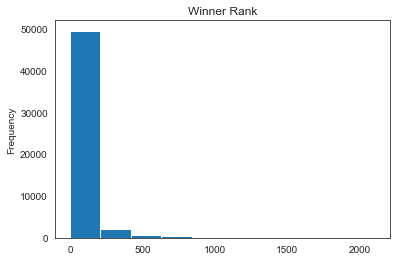

In [11]:
tennis_df['winner_rank'].plot(kind='hist',title='Winner Rank')

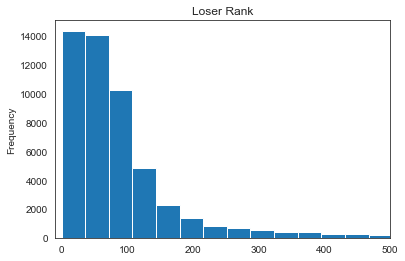

In [12]:
tennis_df['loser_rank'].plot(kind='hist',bins=60, xlim=(-10,500), title='Loser Rank')

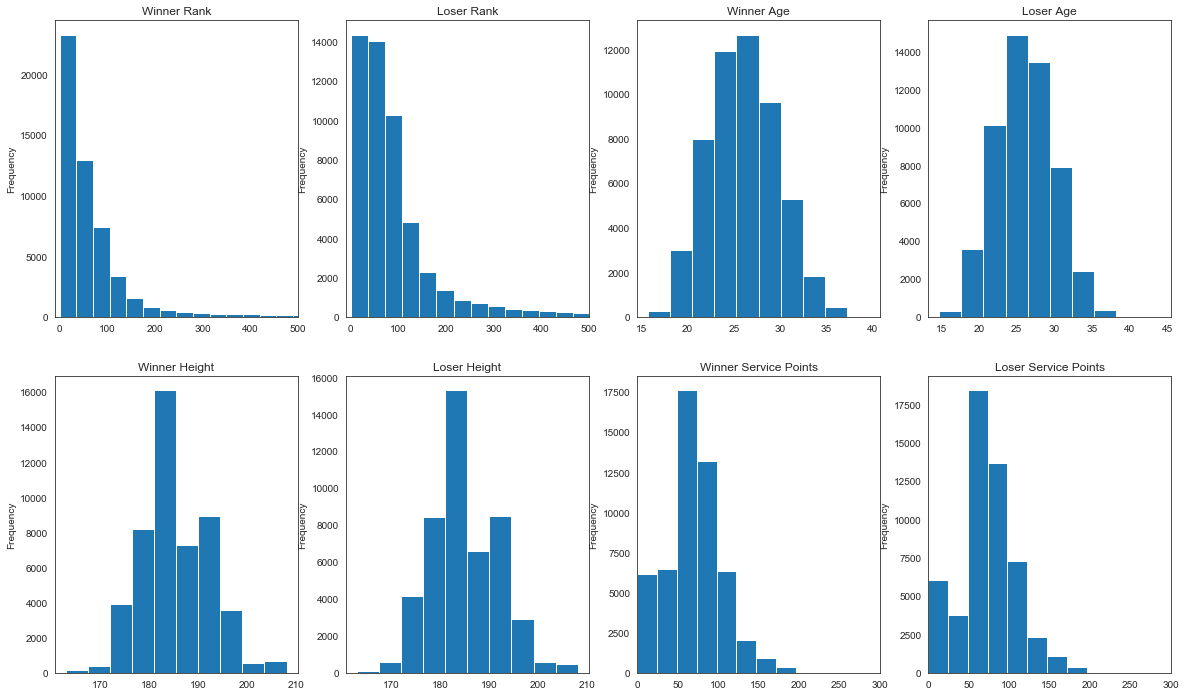

In [13]:
plt.figure(1, figsize=(20,12))
plt.subplot(2,4,1)
tennis_df['winner_rank'].plot(kind='hist',bins=60, xlim=(-10,500), title='Winner Rank')

plt.subplot(2,4,2)
tennis_df['loser_rank'].plot(kind='hist',bins=60, xlim=(-10,500), title='Loser Rank')

plt.subplot(2,4,3)
tennis_df['winner_age'].plot(kind='hist', title='Winner Age')

plt.subplot(2,4,4)
tennis_df['loser_age'].plot(kind='hist', title='Loser Age')

plt.subplot(2,4,5)
tennis_df['winner_ht'].plot(kind='hist', title='Winner Height')

plt.subplot(2,4,6)
tennis_df['loser_ht'].plot(kind='hist', title='Loser Height')

plt.subplot(2,4,7)
tennis_df['w_svpt'].plot(kind='hist', title='Winner Service Points', xlim=(0,300), bins=20)

plt.subplot(2,4,8)
tennis_df['l_svpt'].plot(kind='hist', title='Loser Service Points', xlim=(0,300), bins=20)
plt.show()

In [14]:
tennis_df_1=tennis_df[(tennis_df['round']=='F')&(tennis_df['tourney_name']=='Australian Open')&~np.isnan(tennis_df['loser_rank'])]
tennis_df_1

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,tourney_yearmonth,tourney_year
111037,2000-580,Australian Open,Hard,128,G,20000117,127,101736,1,NaN,...,9,122,65,42,30,18,11,17,200001,2000
113947,2001-580,Australian Open,Hard,128,G,20010115,127,101736,6,NaN,...,7,90,47,28,19,13,8,15,200101,2001
118735,2002-580,Australian Open,Hard,128,G,20020114,127,102563,16,NaN,...,2,142,90,60,28,21,11,14,200201,2002
121206,2003-580,Australian Open,Hard,128,G,20030113,127,101736,2,NaN,...,4,65,33,19,9,12,5,13,200301,2003
125524,2004-580,Australian Open,Hard,128,G,20040119,127,103819,2,NaN,...,5,116,57,36,28,15,13,18,200401,2004
127593,2005-580,Australian Open,Hard,128,G,20050117,127,103498,4,NaN,...,3,125,61,43,33,18,7,11,200501,2005
132064,2006-580,Australian Open,Hard,128,G,20060116,127,103819,1,NaN,...,2,114,55,39,22,19,4,12,200601,2006
135581,2007-580,Australian Open,Hard,128,G,20070115,127,103819,1,NaN,...,3,127,77,53,23,16,7,10,200701,2007
138267,2008-580,Australian Open,Hard,128,G,20080114,127,104925,3,NaN,...,2,136,97,69,18,21,8,12,200801,2008
141671,2009-580,Australian Open,Hard,128,G,20090119,127,104745,1,NaN,...,6,172,89,65,38,26,9,16,200901,2009


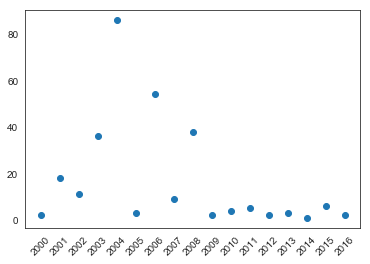

In [15]:
plt.scatter(tennis_df_1['tourney_year'],tennis_df_1['loser_rank'])
plt.xticks(rotation=45)
plt.show()

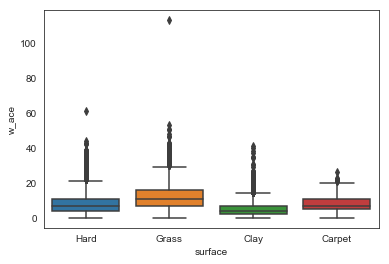

In [16]:
tennis_df_h=tennis_df[(tennis_df['tourney_level']=='G')|(tennis_df['tourney_level']=='M')]
tennis_df_h
sns.boxplot(x='surface',y='w_ace',data=tennis_df_h)
plt.show()

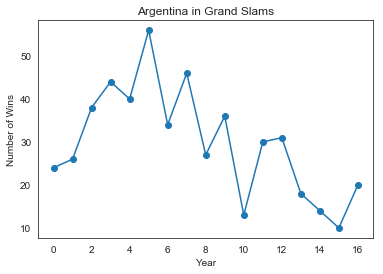

In [17]:
s=tennis_df[(tennis_df['tourney_level']=='G')&(tennis_df['winner_ioc']=='ARG')].groupby(['tourney_year','winner_ioc']).agg('count')
s=s['tourney_id']
plt.plot(s.values,marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Argentina in Grand Slams')
plt.show()

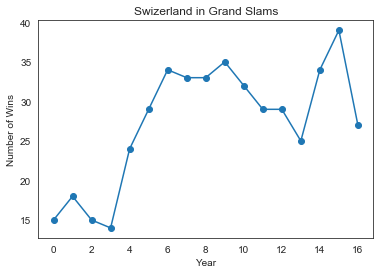

In [18]:
s=tennis_df[(tennis_df['tourney_level']=='G')&(tennis_df['winner_ioc']=='SUI')].groupby(['tourney_year','winner_ioc']).agg('count')
s=s['tourney_id']
plt.plot(s.values,marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Wins')
plt.title('Swizerland in Grand Slams')
plt.show()

In [19]:
sw = tennis_df.groupby(['winner_name']).agg({'w_ace':'sum'}).fillna(0).sort_values(['w_ace'], ascending=False)
sl = tennis_df.groupby(['loser_name']).agg({'l_ace':'sum'}).fillna(0).sort_values(['l_ace'], ascending=False)
dfs=[sw,sl]


In [20]:
r=pd.concat(dfs).reset_index().fillna(0)

/Users/y2z/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [21]:
r['aces']=r['l_ace']+r['w_ace']

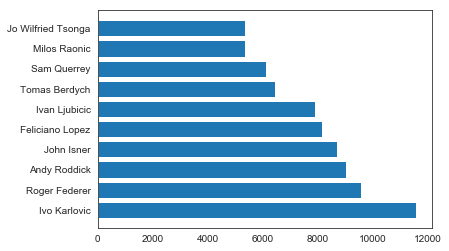

In [22]:
final=r.groupby('index').agg({'aces':'sum'}).sort_values(by='aces',ascending=False).head(10)
plt.barh(y=final.index,width=final.aces)
plt.show()


/Users/y2z/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


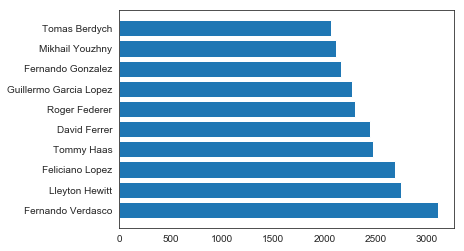

In [23]:
sw = tennis_df.groupby(['winner_name']).agg({'w_df':'sum'}).fillna(0).sort_values(['w_df'], ascending=False)
sl = tennis_df.groupby(['loser_name']).agg({'l_df':'sum'}).fillna(0).sort_values(['l_df'], ascending=False)
dfs=[sw,sl]
r=pd.concat(dfs).reset_index().fillna(0)
r['df']=r['l_df']+r['w_df']
final=r.groupby('index').agg({'df':'sum'}).sort_values(by='df',ascending=False).head(10)
plt.barh(y=final.index,width=final.df)
plt.show()


In [24]:
pl1=tennis_df[(tennis_df['winner_name']=='Roger Federer')].groupby(['tourney_level','tourney_year'],as_index=False).agg(['count'])

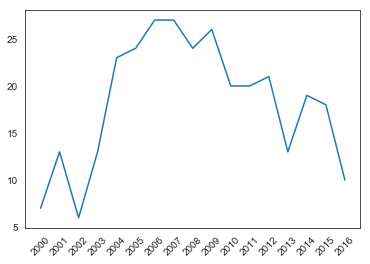

In [25]:
pl11=pl1['tourney_id'].reset_index()
pl11
plt.plot(pl11[pl11['tourney_level']=='G']['tourney_year'],pl11[pl11['tourney_level']=='G']['count'])
plt.xticks(rotation=45)
plt.show()

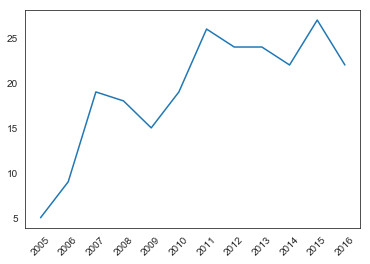

In [26]:
pl1=tennis_df[(tennis_df['winner_name']=='Novak Djokovic')].groupby(['tourney_level','tourney_year'],as_index=False).agg(['count'])
pl11=pl1['tourney_id'].reset_index()
pl11
plt.plot(pl11[pl11['tourney_level']=='G']['tourney_year'],pl11[pl11['tourney_level']=='G']['count'])
plt.xticks(rotation=45)
plt.show()

/Users/y2z/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


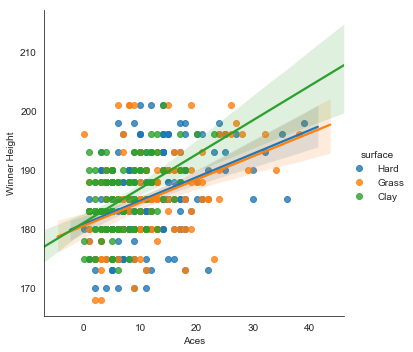

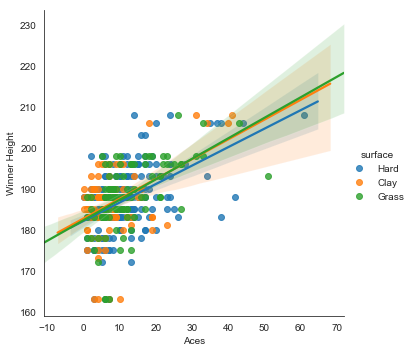

In [27]:
g1=sns.lmplot(x='w_ace',y='winner_ht',hue='surface',data=tennis_df[(tennis_df['tourney_level']=='G')&(tennis_df['tourney_year']=='2000')])
g1.set(xlabel='Aces',ylabel='Winner Height')
plt.show()
g2=sns.lmplot(x='w_ace',y='winner_ht',hue='surface',data=tennis_df[(tennis_df['tourney_level']=='G')&(tennis_df['tourney_year']=='2016')])
g2.set(xlabel='Aces',ylabel='Winner Height')
plt.show()

In [28]:
pw=tennis_df[(tennis_df['winner_name']=='Roger Federer')].groupby(['tourney_year','surface'],as_index=False).agg(['count'])
pww=pw['tourney_id'].reset_index()

In [29]:
pl=tennis_df[(tennis_df['loser_name']=='Roger Federer')].groupby(['tourney_year','surface'],as_index=False).agg(['count'])
pll=pl['tourney_id'].reset_index()

/Users/y2z/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


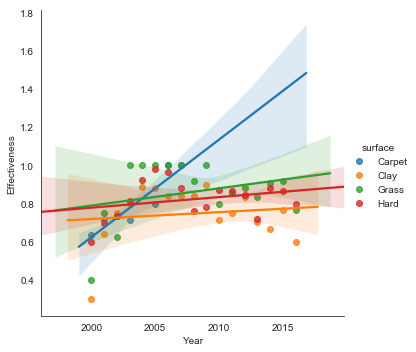

In [30]:
pww.columns=['tourney_year','surface','wins']
pll.columns=['tourney_year','surface','loses']
dfs=[pww,pll]
dfs_concat=pd.concat(dfs)
dfs_finals=dfs_concat.fillna(0).groupby(['surface','tourney_year']).agg({'wins':'sum','loses':'sum'}).reset_index()
dfs_finals['r_eff']=np.where(dfs_finals['loses']>0,dfs_finals['wins']/(dfs_finals['wins']+dfs_finals['loses']),1)
dfs_finals['tourney_year']=dfs_finals['tourney_year'].astype(int)
g=sns.lmplot(x='tourney_year',y='r_eff',hue='surface',data=dfs_finals)
g.set(xlabel='Year',ylabel='Effectiveness')
plt.show()

In [31]:
h2h_wl=tennis_df_all.groupby(['winner_name','loser_name']).agg({'tourney_year':'max','tourney_id':'count'}).reset_index()
h2h_wl.columns=['player_a','player_b','year','total']
h2h_lw=tennis_df_all.groupby(['loser_name','winner_name']).agg({'tourney_year':'max','tourney_id':'count'}).reset_index()
h2h_lw.columns=['player_a','player_b','year','total']
h2h_f=h2h_wl.merge(h2h_lw,on=['player_a','player_b'])

In [32]:
h2h_f['total']=h2h_f['total_x']+h2h_f['total_y']

In [33]:
h2h_f['player_a']=np.where(h2h_f['player_a']<h2h_f['player_b'],h2h_f['player_a'],h2h_f['player_b'])

In [34]:
h2h_f['player_b']=np.where(h2h_f['player_b']<h2h_f['player_a'],h2h_f['player_a'],h2h_f['player_b'])

In [35]:
h2h_f['year']=np.where(h2h_f['year_x']>h2h_f['year_y'],h2h_f['year_x'],h2h_f['year_y'])

In [36]:
h2h_f['names']=h2h_f['player_a'].str.split(' ').str.get(1)+'-'+h2h_f['player_b'].str.split(' ').str.get(1)

In [37]:
h2h_f2=h2h_f.groupby(['player_a','player_b','names']).agg({'total':'max','year':'max'}).reset_index()

In [38]:
h2h_f2_sorted=h2h_f2[h2h_f2['player_a']!=h2h_f2['player_b']].sort_values(by='total',ascending=False)

In [39]:
h2h_f2_sorted['year_period']=pd.cut(h2h_f2_sorted.year.astype(int),[1968,1979,1989,1999,2009,np.inf],labels=['1970s','1980s','1990s','2000s','2010s'])

In [40]:
h2h_f2_sorted.head()


,player_a,player_b,names,total,year,year_period
16450,Novak Djokovic,Rafael Nadal,Djokovic-Nadal,49,2016,2010s
16454,Novak Djokovic,Roger Federer,Djokovic-Federer,46,2016,2010s
11062,Ivan Lendl,John Mcenroe,Lendl-Mcenroe,36,1992,1990s
12587,Jimmy Connors,John Mcenroe,Connors-Mcenroe,35,1991,1990s
3903,Boris Becker,Stefan Edberg,Becker-Edberg,35,1996,1990s


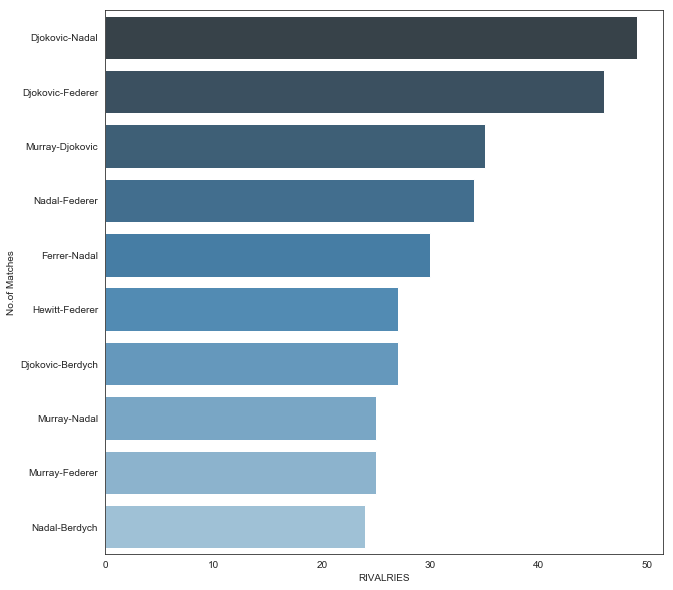

In [59]:
plt.figure(figsize=(10,10))
a=sns.barplot(y='names',x='total',palette='Blues_d',data=h2h_f2_sorted[h2h_f2_sorted.year_period=='2010s'].head(10))

a.set(xlabel='RIVALRIES',ylabel='No.of Matches')
plt.show()